<a href="https://colab.research.google.com/github/dedeepya07/DASS-42-Mental-Health-Prediction/blob/main/dass_42_ml_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/data.csv", sep='\t', low_memory=False )

In [ ]:
data.info()
print(list(data.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB
['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I', 'Q36E'

In [ ]:
print(data)

       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1   

       uniquenetworklocatio

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data["Q1A"].dtype

dtype('int64')

In [ ]:
#changing the response values from range 1-4 to 0-3 for the Dass 42 scales
for i in range(0,124):
    data.iloc[:, i] = data.iloc[:, i].replace([4, 3, 2, 1],[3, 2, 1, 0])
    i = i+3

In [ ]:
print(data)

       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        3   28   3890    3   25  2122    1   16   1944    3  ...           1   
1        3    1   8118    0   36  2890    1   35   4777    2  ...           2   
2        2    7   5784    0   33  4373    3   41   3242    0  ...           2   
3        1   23   5081    2   11  6837    1   37   5521    0  ...           2   
4        1   36   3215    1   13  7731    2    5   4156    3  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    1   31   3287    0    5  2216    2   29   3895    1  ...           2   
39771    2   14   4792    3   41  2604    2   15   2668    3  ...           1   
39772    1    0  25147    0    3  4555    1   14   3388    0  ...           2   
39773    2   36   4286    0   34  2736    1   10   5968    1  ...           2   
39774    1   28  32251    0   22  3317    1    3  11734    0  ...           1   

       uniquenetworklocatio

In [ ]:
data['country'].unique()

array(['IN', 'US', 'PL', 'MY', 'MX', 'GB', 'DE', 'EE', 'CA', 'EC', 'AU',
       'FI', 'ID', 'AE', 'NONE', 'ES', 'NI', 'DO', 'TR', 'NO', 'GR', 'LK',
       'BR', 'AR', 'KH', 'IT', 'MK', 'PT', 'BA', 'RU', 'HU', 'KR', 'IE',
       'RS', 'CZ', 'PH', 'RO', 'FR', 'SG', 'AT', 'UA', 'KW', 'CO', 'GE',
       'SE', 'HK', 'NZ', 'ZA', 'NL', 'DK', 'JM', 'LB', 'CL', 'AW', 'IL',
       'GT', 'PE', 'PK', 'NP', 'HR', 'CR', 'VE', 'BG', 'GH', 'MA', 'PR',
       'SI', 'LV', 'AL', 'VN', 'GU', 'BD', 'TH', 'NG', 'FO', 'UY', 'EG',
       'BE', 'SA', 'SV', 'CH', 'PY', 'SK', 'SY', 'TN', 'TT', 'SR', 'KE',
       'BY', 'PA', 'CY', 'BW', 'MZ', 'BB', 'GG', 'CW', 'IS', 'IR', 'BN',
       'MV', 'OM', 'DZ', 'JP', 'MU', nan, 'IQ', 'BO', 'MD', 'CN', 'LT',
       'BZ', 'BH', 'ME', 'QA', 'TW', 'PS', 'JO', 'SD', 'KY', 'AZ', 'AO',
       'BS', 'GY', 'MO', 'TZ', 'IM', 'AF', 'AM', 'UZ', 'LU', 'ET', 'JE',
       'VU', 'TJ', 'KZ', 'XK', 'HN', 'ZW', 'LA', 'MT', 'SN', 'MN', 'TG',
       'SC', 'RE', 'VC'], dtype=object)

In [ ]:
data = data.drop(['country','major'],axis=1)

print(list(data.columns))

['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I', 'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A', 'Q39I', 'Q39E', 'Q40A', 'Q40I', 'Q40E', 'Q41A', 'Q41I', 'Q41E', 'Q42A', 'Q42I', 'Q42E', 'source', 'introel

In [ ]:
#If a person has taken more than 25s to answer a question, that response is not reliable and so we will not consider it
#for i in range(0,124):
#    for j in range(0, 39775):
#        if(data.iloc[j, i+2] > 25000):
#            data.iloc[j, i] = 0
#        j = j+1
#    i = i+3

In [ ]:
print(data["Q1A"])

0        3
1        3
2        2
3        1
4        1
        ..
39770    1
39771    2
39772    1
39773    2
39774    1
Name: Q1A, Length: 39775, dtype: int64


In [ ]:
#creating outcome columns for Stress, Anxiety and Depression
#stress_scale = []
#def Stress_scale(stress):
#    if stress <=14:
#        stress_scale.append("Normal S")
#    elif stress >14 and stress <=18:
#        stress_scale.append("Mild S")
#    elif stress >18 and stress <= 25:
#        stress_scale.append("Moderate S")
#    elif stress > 25 and stress <= 33:
#        stress_scale.append("Severe S")
#    else:
#        stress_scale.append("Extremely S")
#    return stress_scale


stress = data["Q1A"] + data["Q6A"] + data["Q8A"] + data["Q11A"] + data["Q12A"] + data["Q14A"] + data["Q18A"] + data["Q22A"] +data["Q27A"] + data["Q29A"] + data["Q32A"] + data["Q33A"] + data["Q35A"] + data["Q39A"]
#print(stress)
data["Stress"] = stress
data["Stress_R"] = stress #column to be used for regression approach
data["Stress"] = data["Stress"].apply(lambda stress: 'Normal S' if stress <=14 else ('Mild S' if stress >14 and stress <=18 else ('Moderate S' if stress >18 and stress <= 25 else('Severe S' if stress > 25 and stress <= 33 else 'Extremely S')))) #column used for classification approach
#data["Stress_scale"] = data["Stress"].apply(Stress_scale)
#data["Stress_scale"] = Stress_scale(data[["Stress"]])

anxiety = data["Q2A"] + data["Q4A"] + data["Q7A"] + data["Q9A"] + data["Q15A"] + data["Q19A"] + data["Q20A"] + data["Q23A"] +data["Q25A"] + data["Q28A"] + data["Q30A"] + data["Q36A"] + data["Q40A"] + data["Q41A"]
data["Anxiety"] = anxiety
data["Anxiety_R"] = anxiety
data["Anxiety"] = data["Anxiety"].apply(lambda anxiety: 'Normal A' if anxiety <=7 else ('Mild A' if anxiety >7 and anxiety <=9 else ('Moderate A' if anxiety >9 and anxiety <= 14 else('Severe A' if anxiety > 14 and anxiety <= 19 else 'Extremely A'))))


depression = data["Q3A"] + data["Q5A"] + data["Q10A"] + data["Q13A"] + data["Q16A"] + data["Q17A"] + data["Q21A"] + data["Q24A"] + data["Q26A"] + data["Q31A"] + data["Q34A"] + data["Q37A"] + data["Q38A"] + data["Q42A"]
data["Depression"] = depression
data["Depression_R"] = depression
data["Depression"] = data["Depression"].apply(lambda depression: 'Normal D' if depression <=9 else ('Mild D' if depression >9 and depression <=13 else ('Moderate D' if depression >9 and depression <= 14 else('Severe D' if depression > 14 and depression <= 19 else 'Extremely D'))))
print(data["Anxiety"])
#anxiety = data

0        Extremely A
1           Severe A
2         Moderate A
3           Severe A
4        Extremely A
            ...     
39770     Moderate A
39771    Extremely A
39772       Normal A
39773     Moderate A
39774     Moderate A
Name: Anxiety, Length: 39775, dtype: object


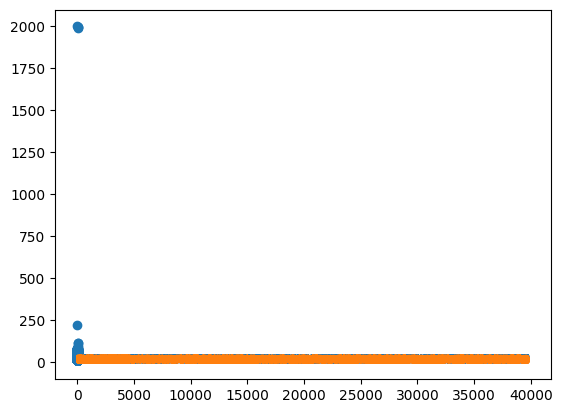

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Stress_R'], data['age'])
plt.plot(data['Depression_R'])
plt.plot(data['Anxiety_R'])

In [ ]:
teen_data = (data['age'] > 12) & (data['age'] <= 19)
teen_data = data.loc[teen_data]
teen_data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,race,voted,married,familysize,Stress,Stress_R,Anxiety,Anxiety_R,Depression,Depression_R
0,3,28,3890,3,25,2122,1,16,1944,3,...,10,2,1,2,Extremely S,40,Extremely A,34,Extremely D,27
1,3,1,8118,0,36,2890,1,35,4777,2,...,70,2,1,4,Severe S,27,Severe A,17,Extremely D,24
2,2,7,5784,0,33,4373,3,41,3242,0,...,60,1,1,3,Mild S,17,Moderate A,12,Extremely D,39
3,1,23,5081,2,11,6837,1,37,5521,0,...,70,2,1,5,Mild S,16,Severe A,17,Severe D,16
4,1,36,3215,1,13,7731,2,5,4156,3,...,10,2,1,4,Severe S,29,Extremely A,40,Extremely D,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39759,1,41,15596,0,24,1818,1,25,1921,0,...,10,2,1,4,Moderate S,19,Moderate A,10,Extremely D,22
39766,1,39,2305,0,33,2188,0,7,1924,1,...,70,1,1,2,Mild S,15,Severe A,19,Normal D,7
39767,3,0,14275,3,3,4721,3,33,3934,2,...,20,2,1,2,Extremely S,38,Extremely A,28,Extremely D,42
39769,2,32,28897,3,3,3025,1,30,3248,1,...,70,2,1,3,Severe S,30,Extremely A,21,Severe D,15


In [ ]:
modeldataR = teen_data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'age','Stress_R','Depression_R','Anxiety_R']]

In [ ]:
#splittin the data in train and test sets
from sklearn.model_selection import train_test_split

In [ ]:
X = modeldataR.iloc[:, :43].values
Y = modeldataR.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, random_state= 8)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11060, 43)
(11060, 3)
(2765, 43)
(2765, 3)


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
#Implementing Linear Regression

log_model = LinearRegression()
wrapper = MultiOutputRegressor(estimator = log_model)
# fit model
wrapper.fit(x_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
log_pred = wrapper.predict(x_test)

log_pred = log_pred.astype(int)
print(log_pred)

[[29 38 24]
 [15  5  7]
 [39 35 37]
 ...
 [ 4  4  5]
 [25 40 18]
 [11  8 14]]


In [ ]:
#Implementing Support Vector Machine Models

from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
clfsvc = SVC(kernel='linear')
modelsvc = MultiOutputRegressor(estimator = clfsvc)
# fitting x samples and y classes
modelsvc.fit(x_train, y_train)

MultiOutputRegressor(estimator=SVC(kernel='linear'))

In [ ]:
predSVC = modelsvc.predict(x_test)

In [ ]:
accuracySVC = np.mean(predSVC == y_test)

print(accuracySVC)

0.9997588908981314


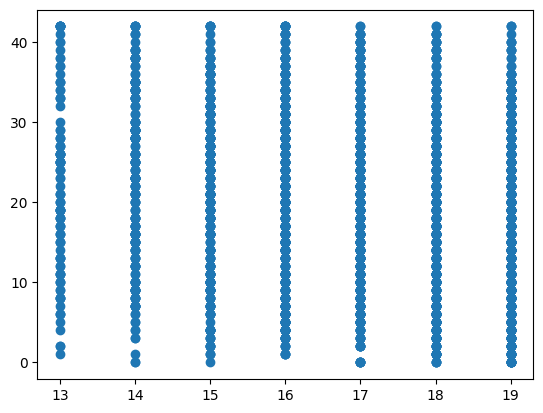

In [ ]:
plt.scatter(x_test[:,-1], y_test[:,-1])

In [ ]:
modeldata = teen_data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A",'age',"Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'Stress','Depression','Anxiety']]


len(modeldata.columns)

46

In [ ]:
X = modeldata.iloc[:, :43].values
Y = modeldata.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, random_state= 8)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11060, 43)
(11060, 3)
(2765, 43)
(2765, 3)


In [ ]:
X_trainA = x_train[:, 14:29]
Y_trainA = y_train[:, -1]

X_testA = x_test[:, 14:29]
Y_testA = y_test[:, -1]

print(X_trainA.shape)
print(Y_trainA.shape)
print(X_testA.shape)
print(Y_testA.shape)

(11060, 15)
(11060,)
(2765, 15)
(2765,)


In [ ]:
#Implementing Logistic Regression for Anxiety

from sklearn.linear_model import LogisticRegression

modelA = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga',max_iter=10000).fit(X_trainA, Y_trainA)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
lrpredA = modelA.predict(X_testA)

In [ ]:
modelA.score(X_trainA, Y_trainA)

1.0

In [ ]:
lraccuracyA = np.mean(lrpredA == Y_testA)

print(lraccuracyA)

0.9996383363471971


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_testA, lrpredA))

              precision    recall  f1-score   support

 Extremely A       1.00      1.00      1.00      1297
      Mild A       1.00      0.99      1.00       172
  Moderate A       1.00      1.00      1.00       426
    Normal A       1.00      1.00      1.00       423
    Severe A       1.00      1.00      1.00       447

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [ ]:
#Implementing Random Forest for Anxiety
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf = rf.fit(X_trainA, Y_trainA)

In [ ]:
# Use the forest's predict method on the test data
rfpredA = rf.predict(X_testA)

rfaccuracyA = np.mean(rfpredA == Y_testA)

print(rfaccuracyA)

0.8806509945750453


In [ ]:
from sklearn import metrics

print("Accuracy score is", metrics.accuracy_score(Y_testA, rfpredA ))

Accuracy score is 0.8806509945750453


In [ ]:
print(classification_report(Y_testA, rfpredA))

              precision    recall  f1-score   support

 Extremely A       0.96      0.97      0.97      1297
      Mild A       0.69      0.20      0.31       172
  Moderate A       0.74      0.88      0.80       426
    Normal A       0.85      0.98      0.91       423
    Severe A       0.84      0.78      0.81       447

    accuracy                           0.88      2765
   macro avg       0.82      0.76      0.76      2765
weighted avg       0.88      0.88      0.87      2765



In [ ]:
#Implementing Decision Tree for Anxiety

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_trainA, Y_trainA)

In [ ]:
dtpredA = dt.predict(X_testA)

dtaccuracyA = np.mean(dtpredA == Y_testA)

print(dtaccuracyA)

0.7529837251356238


In [ ]:
print(classification_report(Y_testA, dtpredA))

              precision    recall  f1-score   support

 Extremely A       0.92      0.91      0.92      1297
      Mild A       0.33      0.33      0.33       172
  Moderate A       0.57      0.58      0.58       426
    Normal A       0.82      0.86      0.84       423
    Severe A       0.54      0.52      0.53       447

    accuracy                           0.75      2765
   macro avg       0.64      0.64      0.64      2765
weighted avg       0.75      0.75      0.75      2765



In [ ]:
#Implementing Support Vector Machine for Anxiety
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = 'linear')
svm = svm.fit(X_trainA, Y_trainA)

In [ ]:
svmpredA = svm.predict(X_testA)

svmaccuracyA = np.mean(svmpredA == Y_testA)

print(svmaccuracyA)

1.0


In [ ]:
print(classification_report(Y_testA, svmpredA))

              precision    recall  f1-score   support

 Extremely A       1.00      1.00      1.00      1297
      Mild A       1.00      1.00      1.00       172
  Moderate A       1.00      1.00      1.00       426
    Normal A       1.00      1.00      1.00       423
    Severe A       1.00      1.00      1.00       447

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [ ]:
#Implementing Naive Bayes for Anxiety
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_trainA, Y_trainA)

In [ ]:
gnbpredA = gnb.predict(X_testA)

gnbaccuracyA = np.mean(gnbpredA == Y_testA)

print(gnbaccuracyA)

0.8209764918625678


In [ ]:
print(classification_report(Y_testA, gnbpredA))

              precision    recall  f1-score   support

 Extremely A       1.00      0.86      0.93      1297
      Mild A       0.52      0.34      0.41       172
  Moderate A       0.69      0.83      0.75       426
    Normal A       0.91      0.86      0.88       423
    Severe A       0.61      0.85      0.71       447

    accuracy                           0.82      2765
   macro avg       0.74      0.75      0.74      2765
weighted avg       0.84      0.82      0.82      2765



In [ ]:
X_trainA.shape

(11060, 15)

In [ ]:
modeldataS = teen_data[['age','Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'Stress','Depression','Anxiety']]

In [ ]:
X = modeldataS.iloc[:, :43].values
Y = modeldataS.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, random_state= 8)

In [ ]:
X_trainS = x_train[:, :15]
Y_trainS = y_train[:, -3]

X_testS = x_test[:, :15]
Y_testS = y_test[:, -3]

print(X_trainS.shape)
print(Y_trainS.shape)
print(X_testS.shape)
print(Y_testS.shape)

(11060, 15)
(11060,)
(2765, 15)
(2765,)


In [ ]:
#Implementing Logistic Regression for Stress

modelS = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga',max_iter=10000).fit(X_trainS, Y_trainS)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
lrpredS = modelS.predict(X_testS)

In [ ]:
modelS.score(X_trainS, Y_trainS)

1.0

In [ ]:
lraccuracyS = np.mean(lrpredS == Y_testS)

print(lraccuracyS)

0.9996383363471971


In [ ]:
print(classification_report(Y_testS, lrpredS))

              precision    recall  f1-score   support

 Extremely S       1.00      1.00      1.00       508
      Mild S       1.00      1.00      1.00       326
  Moderate S       1.00      1.00      1.00       649
    Normal S       1.00      1.00      1.00       597
    Severe S       1.00      1.00      1.00       685

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [ ]:
#Implementing Random Forest for Stress
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf = rf.fit(X_trainS, Y_trainS)

In [ ]:
# Use the forest's predict method on the test data
rfpredS = rf.predict(X_testS)

rfaccuracyS = np.mean(rfpredS == Y_testS)

print(rfaccuracyS)

0.9009041591320073


In [ ]:
print("Accuracy score is", metrics.accuracy_score(Y_testS, rfpredS ))

Accuracy score is 0.9009041591320073


In [ ]:
print(classification_report(Y_testS, rfpredS))

              precision    recall  f1-score   support

 Extremely S       0.97      0.92      0.95       508
      Mild S       0.86      0.65      0.74       326
  Moderate S       0.85      0.92      0.88       649
    Normal S       0.93      0.97      0.95       597
    Severe S       0.89      0.93      0.91       685

    accuracy                           0.90      2765
   macro avg       0.90      0.88      0.89      2765
weighted avg       0.90      0.90      0.90      2765



In [ ]:
#Implementing Decision Tree for Stress
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_trainS, Y_trainS)

In [ ]:
dtpredS = dt.predict(X_testS)

dtaccuracyS = np.mean(dtpredS == Y_testS)

print(dtaccuracyS)

0.7410488245931284


In [ ]:
print(classification_report(Y_testS, dtpredS))

              precision    recall  f1-score   support

 Extremely S       0.84      0.84      0.84       508
      Mild S       0.51      0.50      0.50       326
  Moderate S       0.69      0.68      0.69       649
    Normal S       0.85      0.88      0.86       597
    Severe S       0.72      0.73      0.72       685

    accuracy                           0.74      2765
   macro avg       0.72      0.72      0.72      2765
weighted avg       0.74      0.74      0.74      2765



In [ ]:
#Implementing SVM for Stress
svm = SVC(kernel = 'linear')
svm = svm.fit(X_trainS, Y_trainS)

In [ ]:
svmpredS = svm.predict(X_testS)

svmaccuracyS = np.mean(svmpredS == Y_testS)

print(svmaccuracyS)

1.0


In [ ]:
print(classification_report(Y_testS, svmpredS))

              precision    recall  f1-score   support

 Extremely S       1.00      1.00      1.00       508
      Mild S       1.00      1.00      1.00       326
  Moderate S       1.00      1.00      1.00       649
    Normal S       1.00      1.00      1.00       597
    Severe S       1.00      1.00      1.00       685

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [ ]:
#Implementing Naive Bayes for Stress
gnb = GaussianNB()
gnb = gnb.fit(X_trainS, Y_trainS)

In [ ]:
gnbpredS = gnb.predict(X_testS)

gnbaccuracyS = np.mean(gnbpredS == Y_testS)

print(gnbaccuracyS)

0.894755877034358


In [ ]:
X_trainS.shape

(11060, 15)

In [ ]:
print(classification_report(Y_testS, gnbpredS))

              precision    recall  f1-score   support

 Extremely S       0.96      0.86      0.91       508
      Mild S       0.75      0.85      0.80       326
  Moderate S       0.87      0.94      0.90       649
    Normal S       1.00      0.88      0.93       597
    Severe S       0.87      0.92      0.89       685

    accuracy                           0.89      2765
   macro avg       0.89      0.89      0.89      2765
weighted avg       0.90      0.89      0.90      2765



In [ ]:
modeldataD = teen_data[['Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A',
"Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A","Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A","Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A",'age','Stress','Depression','Anxiety']]

In [ ]:
X = modeldataD.iloc[:, :43].values
Y = modeldataD.iloc[:, 43:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, random_state= 8)

In [ ]:
X_trainD = x_train[:, 28:43]
Y_trainD = y_train[:, -2]

X_testD = x_test[:, 28:43]
Y_testD = y_test[:, -2]

print(X_trainD.shape)
print(Y_trainD.shape)
print(X_testD.shape)
print(Y_testD.shape)

(11060, 15)
(11060,)
(2765, 15)
(2765,)


In [ ]:
#Implementing Logistic Regression for Depression

modelD = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga',max_iter=10000).fit(X_trainD, Y_trainD)

lrpredD = modelD.predict(X_testD)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
modelD.score(X_trainD, Y_trainD)

0.9954792043399638

In [ ]:
lraccuracyD = np.mean(lrpredD == Y_testD)

print(lraccuracyD)

0.9927667269439421


In [ ]:
print(classification_report(Y_testD, lrpredD))

              precision    recall  f1-score   support

 Extremely D       1.00      1.00      1.00      1680
      Mild D       0.97      1.00      0.98       232
  Moderate D       1.00      0.68      0.81        63
    Normal D       1.00      1.00      1.00       461
    Severe D       0.96      1.00      0.98       329

    accuracy                           0.99      2765
   macro avg       0.99      0.94      0.96      2765
weighted avg       0.99      0.99      0.99      2765



In [ ]:
#Implementing Random Forest for Depression
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf = rf.fit(X_trainD, Y_trainD)

In [ ]:
# Use the forest's predict method on the test data
rfpredD = rf.predict(X_testD)

rfaccuracyD = np.mean(rfpredD == Y_testD)

print(rfaccuracyD)

0.9316455696202531


In [ ]:
print("Accuracy score is", metrics.accuracy_score(Y_testD, rfpredD ))

Accuracy score is 0.9316455696202531


In [ ]:
print(classification_report(Y_testD, rfpredD))

              precision    recall  f1-score   support

 Extremely D       0.98      0.99      0.98      1680
      Mild D       0.80      0.76      0.78       232
  Moderate D       0.56      0.08      0.14        63
    Normal D       0.93      0.98      0.95       461
    Severe D       0.81      0.84      0.82       329

    accuracy                           0.93      2765
   macro avg       0.81      0.73      0.74      2765
weighted avg       0.92      0.93      0.92      2765



In [ ]:
#Implementing Decision Tree for Depression
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_trainD, Y_trainD)

In [ ]:
dtpredD = dt.predict(X_testD)

dtaccuracyD = np.mean(dtpredD == Y_testD)

print(dtaccuracyD)

0.854249547920434


In [ ]:
print(classification_report(Y_testD, dtpredD))

              precision    recall  f1-score   support

 Extremely D       0.96      0.96      0.96      1680
      Mild D       0.54      0.55      0.55       232
  Moderate D       0.19      0.19      0.19        63
    Normal D       0.89      0.89      0.89       461
    Severe D       0.63      0.62      0.62       329

    accuracy                           0.85      2765
   macro avg       0.64      0.64      0.64      2765
weighted avg       0.85      0.85      0.85      2765



In [ ]:
#Implementing the SVM model for Depression
svm = SVC(kernel = 'linear')
svm = svm.fit(X_trainD, Y_trainD)

In [ ]:
svmpredD = svm.predict(X_testD)

svmaccuracyD = np.mean(svmpredD == Y_testD)

print(svmaccuracyD)

1.0


In [ ]:
print(classification_report(Y_testD, svmpredD))

              precision    recall  f1-score   support

 Extremely D       1.00      1.00      1.00      1680
      Mild D       1.00      1.00      1.00       232
  Moderate D       1.00      1.00      1.00        63
    Normal D       1.00      1.00      1.00       461
    Severe D       1.00      1.00      1.00       329

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [ ]:
print(classification_report(Y_testD, svmpredD))

              precision    recall  f1-score   support

 Extremely D       1.00      1.00      1.00      1680
      Mild D       1.00      1.00      1.00       232
  Moderate D       1.00      1.00      1.00        63
    Normal D       1.00      1.00      1.00       461
    Severe D       1.00      1.00      1.00       329

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765



In [ ]:
#Implementing Naive Bayes for Depression
gnb = GaussianNB()
gnb = gnb.fit(X_trainD, Y_trainD)

In [ ]:
gnbpredD = gnb.predict(X_testD)

gnbaccuracyD = np.mean(gnbpredD == Y_testD)

print(gnbaccuracyD)

0.854249547920434


In [ ]:
print(classification_report(Y_testD, gnbpredD))

              precision    recall  f1-score   support

 Extremely D       1.00      0.86      0.92      1680
      Mild D       0.67      0.87      0.76       232
  Moderate D       0.00      0.00      0.00        63
    Normal D       1.00      0.87      0.93       461
    Severe D       0.52      0.98      0.68       329

    accuracy                           0.85      2765
   macro avg       0.64      0.71      0.66      2765
weighted avg       0.89      0.85      0.86      2765



<ipython-input-100-da6ab25a5c17>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Stress', palette='viridis')
<ipython-input-100-da6ab25a5c17>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Anxiety', palette='viridis')
<ipython-input-100-da6ab25a5c17>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Depression', palette='viridis')


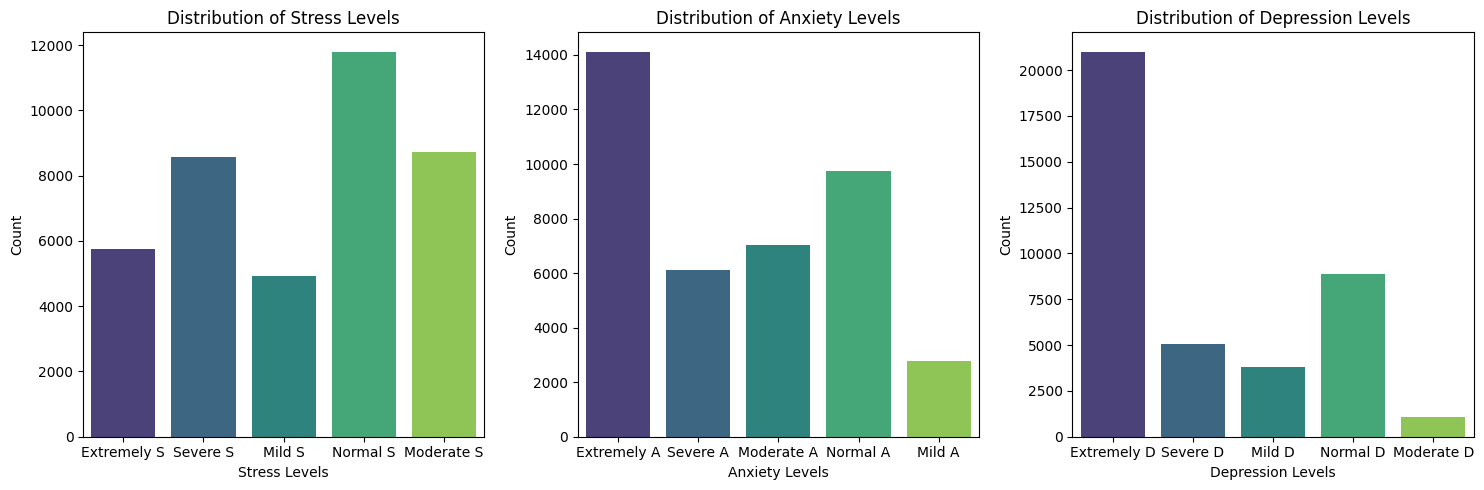

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of Stress, Anxiety, and Depression
plt.figure(figsize=(15, 5))

# Stress Distribution
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Stress', palette='viridis')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Count')

# Anxiety Distribution
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Anxiety', palette='viridis')
plt.title('Distribution of Anxiety Levels')
plt.xlabel('Anxiety Levels')
plt.ylabel('Count')

# Depression Distribution
plt.subplot(1, 3, 3)
sns.countplot(data=data, x='Depression', palette='viridis')
plt.title('Distribution of Depression Levels')
plt.xlabel('Depression Levels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from xgboost import XGBClassifier

# Encode labels for Anxiety
label_encoderA = LabelEncoder()
Y_trainA_encoded = label_encoderA.fit_transform(Y_trainA)  # Fit and transform training labels
Y_testA_encoded = label_encoderA.transform(Y_testA)        # Only transform test labels

# Implementing XGBoost for Anxiety
xgb_modelA = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_modelA.fit(X_trainA, Y_trainA_encoded)

xgb_predA_encoded = xgb_modelA.predict(X_testA)
xgb_predA = label_encoderA.inverse_transform(xgb_predA_encoded)  # Decode predictions
xgbaccuracyA = np.mean(xgb_predA == Y_testA)

print("XGBoost Accuracy for Anxiety:", xgbaccuracyA)
print(classification_report(Y_testA, xgb_predA))

# Repeat the same process for Stress
label_encoderS = LabelEncoder()
Y_trainS_encoded = label_encoderS.fit_transform(Y_trainS)
Y_testS_encoded = label_encoderS.transform(Y_testS)

xgb_modelS = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_modelS.fit(X_trainS, Y_trainS_encoded)

xgb_predS_encoded = xgb_modelS.predict(X_testS)
xgb_predS = label_encoderS.inverse_transform(xgb_predS_encoded)
xgbaccuracyS = np.mean(xgb_predS == Y_testS)

print("XGBoost Accuracy for Stress:", xgbaccuracyS)
print(classification_report(Y_testS, xgb_predS))

# Repeat the same process for Depression
label_encoderD = LabelEncoder()
Y_trainD_encoded = label_encoderD.fit_transform(Y_trainD)
Y_testD_encoded = label_encoderD.transform(Y_testD)

xgb_modelD = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_modelD.fit(X_trainD, Y_trainD_encoded)

xgb_predD_encoded = xgb_modelD.predict(X_testD)
xgb_predD = label_encoderD.inverse_transform(xgb_predD_encoded)
xgbaccuracyD = np.mean(xgb_predD == Y_testD)

print("XGBoost Accuracy for Depression:", xgbaccuracyD)
print(classification_report(Y_testD, xgb_predD))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:55:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy for Anxiety: 0.9063291139240506
              precision    recall  f1-score   support

 Extremely A       0.98      0.97      0.97      1297
      Mild A       0.70      0.53      0.61       172
  Moderate A       0.80      0.87      0.84       426
    Normal A       0.92      0.96      0.94       423
    Severe A       0.85      0.85      0.85       447

    accuracy                           0.91      2765
   macro avg       0.85      0.84      0.84      2765
weighted avg       0.90      0.91      0.90      2765



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:55:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy for Stress: 0.9236889692585896
              precision    recall  f1-score   support

 Extremely S       0.96      0.96      0.96       508
      Mild S       0.84      0.78      0.81       326
  Moderate S       0.89      0.92      0.91       649
    Normal S       0.95      0.97      0.96       597
    Severe S       0.94      0.93      0.93       685

    accuracy                           0.92      2765
   macro avg       0.92      0.91      0.91      2765
weighted avg       0.92      0.92      0.92      2765



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:55:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy for Depression: 0.9399638336347197
              precision    recall  f1-score   support

 Extremely D       0.99      0.99      0.99      1680
      Mild D       0.81      0.79      0.80       232
  Moderate D       0.55      0.17      0.27        63
    Normal D       0.93      0.98      0.95       461
    Severe D       0.84      0.88      0.86       329

    accuracy                           0.94      2765
   macro avg       0.82      0.76      0.77      2765
weighted avg       0.93      0.94      0.93      2765



<ipython-input-103-b9b7c2d2178d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


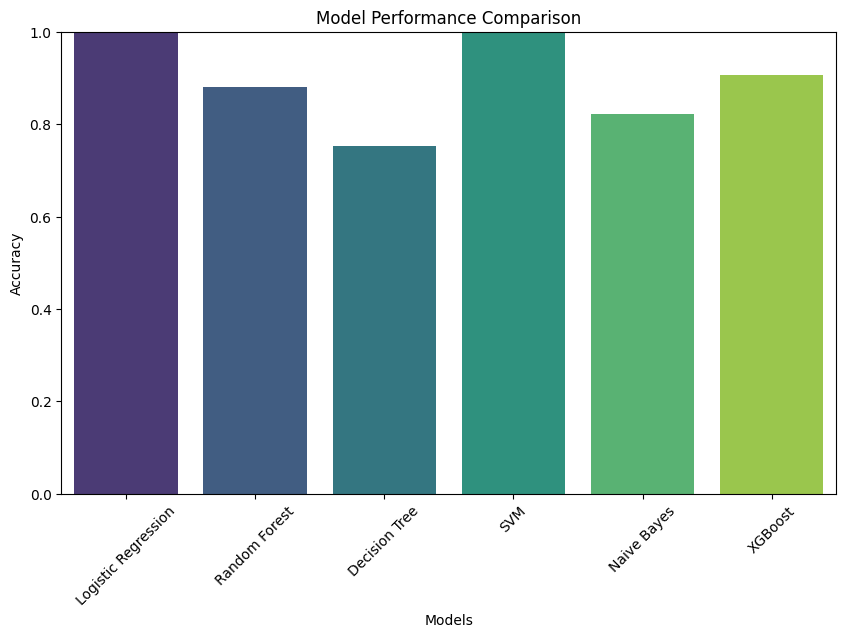

In [ ]:
# Model performance comparison
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'XGBoost']
accuracies = [lraccuracyA, rfaccuracyA, dtaccuracyA, svmaccuracyA, gnbaccuracyA, xgbaccuracyA]  # Add XGBoost accuracy here

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Function to convert classification report to DataFrame
def report_to_dataframe(report):
    report_df = pd.DataFrame(report).transpose()
    return report_df

# Get classification reports for each model
reportA_lr = classification_report(Y_testA, lrpredA, output_dict=True)
reportA_rf = classification_report(Y_testA, rfpredA, output_dict=True)
reportA_dt = classification_report(Y_testA, dtpredA, output_dict=True)
reportA_svm = classification_report(Y_testA, svmpredA, output_dict=True)
reportA_gnb = classification_report(Y_testA, gnbpredA, output_dict=True)
reportA_xgb = classification_report(Y_testA, xgb_predA, output_dict=True)

reportS_lr = classification_report(Y_testS, lrpredS, output_dict=True)
reportS_rf = classification_report(Y_testS, rfpredS, output_dict=True)
reportS_dt = classification_report(Y_testS, dtpredS, output_dict=True)
reportS_svm = classification_report(Y_testS, svmpredS, output_dict=True)
reportS_gnb = classification_report(Y_testS, gnbpredS, output_dict=True)
reportS_xgb = classification_report(Y_testS, xgb_predS, output_dict=True)

reportD_lr = classification_report(Y_testD, lrpredD, output_dict=True)
reportD_rf = classification_report(Y_testD, rfpredD, output_dict=True)
reportD_dt = classification_report(Y_testD, dtpredD, output_dict=True)
reportD_svm = classification_report(Y_testD, svmpredD, output_dict=True)
reportD_gnb = classification_report(Y_testD, gnbpredD, output_dict=True)
reportD_xgb = classification_report(Y_testD, xgb_predD, output_dict=True)

# Create DataFrames for each model's report
dfA_lr = report_to_dataframe(reportA_lr)
dfA_rf = report_to_dataframe(reportA_rf)
dfA_dt = report_to_dataframe(reportA_dt)
dfA_svm = report_to_dataframe(reportA_svm)
dfA_gnb = report_to_dataframe(reportA_gnb)
dfA_xgb = report_to_dataframe(reportA_xgb)

dfS_lr = report_to_dataframe(reportS_lr)
dfS_rf = report_to_dataframe(reportS_rf)
dfS_dt = report_to_dataframe(reportS_dt)
dfS_svm = report_to_dataframe(reportS_svm)
dfS_gnb = report_to_dataframe(reportS_gnb)
dfS_xgb = report_to_dataframe(reportS_xgb)

dfD_lr = report_to_dataframe(reportD_lr)
dfD_rf = report_to_dataframe(reportD_rf)
dfD_dt = report_to_dataframe(reportD_dt)
dfD_svm = report_to_dataframe(reportD_svm)
dfD_gnb = report_to_dataframe(reportD_gnb)
dfD_xgb = report_to_dataframe(reportD_xgb)

# Combine all reports into a single DataFrame
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'XGBoost'],
    'Anxiety Precision': [dfA_lr.loc['Extremely A', 'precision'], dfA_rf.loc['Extremely A', 'precision'], dfA_dt.loc['Extremely A', 'precision'], dfA_svm.loc['Extremely A', 'precision'], dfA_gnb.loc['Extremely A', 'precision'], dfA_xgb.loc['Extremely A', 'precision']],
    'Anxiety Recall': [dfA_lr.loc['Extremely A', 'recall'], dfA_rf.loc['Extremely A', 'recall'], dfA_dt.loc['Extremely A', 'recall'], dfA_svm.loc['Extremely A', 'recall'], dfA_gnb.loc['Extremely A', 'recall'], dfA_xgb.loc['Extremely A', 'recall']],
    'Anxiety F1-Score': [dfA_lr.loc['Extremely A', 'f1-score'], dfA_rf.loc['Extremely A', 'f1-score'], dfA_dt.loc['Extremely A', 'f1-score'], dfA_svm.loc['Extremely A', 'f1-score'], dfA_gnb.loc['Extremely A', 'f1-score'], dfA_xgb.loc['Extremely A', 'f1-score']],

    'Stress Precision': [dfS_lr.loc['Extremely S', 'precision'], dfS_rf.loc['Extremely S', 'precision'], dfS_dt.loc['Extremely S', 'precision'], dfS_svm.loc['Extremely S', 'precision'], dfS_gnb.loc['Extremely S', 'precision'], dfS_xgb.loc['Extremely S', 'precision']],
    'Stress Recall': [dfS_lr.loc['Extremely S', 'recall'], dfS_rf.loc['Extremely S', 'recall'], dfS_dt.loc['Extremely S', 'recall'], dfS_svm.loc['Extremely S', 'recall'], dfS_gnb.loc['Extremely S', 'recall'], dfS_xgb.loc['Extremely S', 'recall']],
    'Stress F1-Score': [dfS_lr.loc['Extremely S', 'f1-score'], dfS_rf.loc['Extremely S', 'f1-score'], dfS_dt.loc['Extremely S', 'f1-score'], dfS_svm.loc['Extremely S', 'f1-score'], dfS_gnb.loc['Extremely S', 'f1-score'], dfS_xgb.loc['Extremely S', 'f1-score']],

    'Depression Precision': [dfD_lr.loc['Extremely D', 'precision'], dfD_rf.loc['Extremely D', 'precision'], dfD_dt.loc['Extremely D', 'precision'], dfD_svm.loc['Extremely D', 'precision'], dfD_gnb.loc['Extremely D', 'precision'], dfD_xgb.loc['Extremely D', 'precision']],
    'Depression Recall': [dfD_lr.loc['Extremely D', 'recall'], dfD_rf.loc['Extremely D', 'recall'], dfD_dt.loc['Extremely D', 'recall'], dfD_svm.loc['Extremely D', 'recall'], dfD_gnb.loc['Extremely D', 'recall'], dfD_xgb.loc['Extremely D', 'recall']],
    'Depression F1-Score': [dfD_lr.loc['Extremely D', 'f1-score'], dfD_rf.loc['Extremely D', 'f1-score'], dfD_dt.loc['Extremely D', 'f1-score'], dfD_svm.loc['Extremely D', 'f1-score'], dfD_gnb.loc['Extremely D', 'f1-score'], dfD_xgb.loc['Extremely D', 'f1-score']],
})

# Display the summary DataFrame
print(summary_df)

                 Model  Anxiety Precision  Anxiety Recall  Anxiety F1-Score  \
0  Logistic Regression           1.000000        1.000000          1.000000   
1        Random Forest           0.963415        0.974557          0.968954   
2        Decision Tree           0.919255        0.912876          0.916054   
3                  SVM           1.000000        1.000000          1.000000   
4          Naive Bayes           0.998216        0.862760          0.925558   
5              XGBoost           0.979735        0.969160          0.974419   

   Stress Precision  Stress Recall  Stress F1-Score  Depression Precision  \
0          1.000000       1.000000         1.000000              1.000000   
1          0.972917       0.919291         0.945344              0.977140   
2          0.841584       0.836614         0.839092              0.958259   
3          1.000000       1.000000         1.000000              1.000000   
4          0.964680       0.860236         0.909469          

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Function to convert classification report to DataFrame
def report_to_dataframe(report):
    report_df = pd.DataFrame(report).transpose()
    return report_df

# Get classification reports for each model
reportA_lr = classification_report(Y_testA, lrpredA, output_dict=True)
reportA_rf = classification_report(Y_testA, rfpredA, output_dict=True)
reportA_dt = classification_report(Y_testA, dtpredA, output_dict=True)
reportA_svm = classification_report(Y_testA, svmpredA, output_dict=True)
reportA_gnb = classification_report(Y_testA, gnbpredA, output_dict=True)
reportA_xgb = classification_report(Y_testA, xgb_predA, output_dict=True)

reportS_lr = classification_report(Y_testS, lrpredS, output_dict=True)
reportS_rf = classification_report(Y_testS, rfpredS, output_dict=True)
reportS_dt = classification_report(Y_testS, dtpredS, output_dict=True)
reportS_svm = classification_report(Y_testS, svmpredS, output_dict=True)
reportS_gnb = classification_report(Y_testS, gnbpredS, output_dict=True)
reportS_xgb = classification_report(Y_testS, xgb_predS, output_dict=True)

reportD_lr = classification_report(Y_testD, lrpredD, output_dict=True)
reportD_rf = classification_report(Y_testD, rfpredD, output_dict=True)
reportD_dt = classification_report(Y_testD, dtpredD, output_dict=True)
reportD_svm = classification_report(Y_testD, svmpredD, output_dict=True)
reportD_gnb = classification_report(Y_testD, gnbpredD, output_dict=True)
reportD_xgb = classification_report(Y_testD, xgb_predD, output_dict=True)

# Create a DataFrame for precision scores only
precision_summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'XGBoost'],
    'Anxiety Precision': [
        reportA_lr['Extremely A']['precision'],
        reportA_rf['Extremely A']['precision'],
        reportA_dt['Extremely A']['precision'],
        reportA_svm['Extremely A']['precision'],
        reportA_gnb['Extremely A']['precision'],
        reportA_xgb['Extremely A']['precision']
    ],
    'Stress Precision': [
        reportS_lr['Extremely S']['precision'],
        reportS_rf['Extremely S']['precision'],
        reportS_dt['Extremely S']['precision'],
        reportS_svm['Extremely S']['precision'],
        reportS_gnb['Extremely S']['precision'],
        reportS_xgb['Extremely S']['precision']
    ],
    'Depression Precision': [
        reportD_lr['Extremely D']['precision'],
        reportD_rf['Extremely D']['precision'],
        reportD_dt['Extremely D']['precision'],
        reportD_svm['Extremely D']['precision'],
        reportD_gnb['Extremely D']['precision'],
        reportD_xgb['Extremely D']['precision']
    ]
})

# Save the precision summary DataFrame to an Excel file
precision_summary_df.to_excel('model_precision_summary.xlsx', index=False)

# Display the DataFrame
print(precision_summary_df)

                 Model  Anxiety Precision  Stress Precision  \
0  Logistic Regression           1.000000          1.000000   
1        Random Forest           0.963415          0.972917   
2        Decision Tree           0.919255          0.841584   
3                  SVM           1.000000          1.000000   
4          Naive Bayes           0.998216          0.964680   
5              XGBoost           0.979735          0.964356   

   Depression Precision  
0              1.000000  
1              0.977140  
2              0.958259  
3              1.000000  
4              1.000000  
5              0.985198  


In [ ]:
from google.colab import files
files.download('model_precision_summary.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>